In [80]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [81]:
# Extract data
marketData = pd.read_csv('../../ETL/Load/marketData.csv', header=(0), sep=';')
MLP_results = pd.read_csv('../Multilayer Perceptron/MLP_test_results.csv', header=(0), sep=';')
anfis_results = pd.read_csv('../Adaptative Neuro-Fuzzy Inference System/anfis_test_results.csv', header=(0), sep=';')

# Convert Date to pd.Datetime
marketData['DATE'] = pd.to_datetime(marketData['DATE'])
MLP_results['DATE'] = pd.to_datetime(MLP_results['DATE'])
anfis_results['DATE'] = pd.to_datetime(anfis_results['DATE'])

In [82]:
marketData

,TICKER,DATE,CLOSE,FUTURE_CLOSE,APPRECIATION
0,BOVA11.SA,2013-01-01,58.689999,46.459999,-0.208383
1,BOVA11.SA,2013-02-01,56.139999,46.080002,-0.179195
2,BOVA11.SA,2013-03-01,55.099998,49.090000,-0.109074
3,BOVA11.SA,2013-04-01,54.450001,50.290001,-0.076400
4,BOVA11.SA,2013-05-01,52.450001,49.980000,-0.047092
...,...,...,...,...,...
127,BOVA11.SA,2023-08-01,112.309998,132.600006,0.180661
128,BOVA11.SA,2023-09-01,113.150002,128.429993,0.135042
129,BOVA11.SA,2023-10-01,109.620003,126.260002,0.151797
130,BOVA11.SA,2023-11-01,123.570000,122.320000,-0.010116


In [83]:
MLP_results

,TICKER,DATE,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,APPRECIATION,CLASS,SIGNAL,CLASS_PRED
0,ALOS3,2023-11-01,59.120586,20.860601,0.028201,0.459067,0.007765,1.667289,3.265974e+09,0.000000e+00,3.776033e+08,3.215209,0.58830,-0.183201,0,-1.000000,0
1,ALOS3,2023-12-01,61.362452,20.860601,0.028201,0.459067,0.007481,1.730512,3.265974e+09,0.000000e+00,3.776033e+08,3.215209,0.58830,-0.262927,0,-1.000000,0
2,AMER3,2023-01-01,64.440693,21.069509,0.034177,-0.000000,-0.000000,2.202412,2.191289e+10,1.234075e+10,7.551659e+08,1.643033,0.72010,-0.531429,0,-0.999984,0
3,AMER3,2023-02-01,36.823253,21.069509,0.034177,-0.000000,-0.000000,1.258521,2.191289e+10,1.234075e+10,7.551659e+08,1.643033,0.72010,-0.490000,0,-1.000000,0
4,AMER3,2023-03-01,36.823253,21.069509,0.034177,-0.000000,-0.000000,1.258521,2.191289e+10,1.234075e+10,7.551659e+08,1.643033,0.72010,-0.350000,0,-1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,YDUQ3,2023-08-01,-102.086973,10.561267,-0.018731,-0.677386,0.006635,1.912161,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.501691,0,-1.000000,0
1736,YDUQ3,2023-09-01,-99.581156,10.561267,-0.018731,-0.677386,0.006802,1.865226,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.529218,0,-1.000000,0
1737,YDUQ3,2023-10-01,-88.856255,10.561267,-0.018731,-0.677386,0.007623,1.664341,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.390872,0,-1.000000,0
1738,YDUQ3,2023-11-01,-100.683712,10.561267,-0.018731,-0.677386,0.006728,1.885877,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.531334,0,-1.000000,0


In [84]:
anfis_results

,TICKER,DATE,PE,BVPS,ROE,DPR,DY,PBR,CA,GROSS_DEBT,ANS,CURRENT_RATIO,EPS,APPRECIATION,CLASS,SIGNAL,CLASS_PRED
0,ALOS3,2023-11-01,59.120586,20.860601,0.028201,0.459067,0.007765,1.667289,3.265974e+09,0.000000e+00,3.776033e+08,3.215209,0.58830,-0.183201,0,0.510404,0
1,ALOS3,2023-12-01,61.362452,20.860601,0.028201,0.459067,0.007481,1.730512,3.265974e+09,0.000000e+00,3.776033e+08,3.215209,0.58830,-0.262927,0,0.512999,0
2,AMER3,2023-01-01,64.440693,21.069509,0.034177,-0.000000,-0.000000,2.202412,2.191289e+10,1.234075e+10,7.551659e+08,1.643033,0.72010,-0.531429,0,0.371881,0
3,AMER3,2023-02-01,36.823253,21.069509,0.034177,-0.000000,-0.000000,1.258521,2.191289e+10,1.234075e+10,7.551659e+08,1.643033,0.72010,-0.490000,0,0.335485,0
4,AMER3,2023-03-01,36.823253,21.069509,0.034177,-0.000000,-0.000000,1.258521,2.191289e+10,1.234075e+10,7.551659e+08,1.643033,0.72010,-0.350000,0,0.335485,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,YDUQ3,2023-08-01,-102.086973,10.561267,-0.018731,-0.677386,0.006635,1.912161,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.501691,0,0.331814,0
1736,YDUQ3,2023-09-01,-99.581156,10.561267,-0.018731,-0.677386,0.006802,1.865226,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.529218,0,0.336666,0
1737,YDUQ3,2023-10-01,-88.856255,10.561267,-0.018731,-0.677386,0.007623,1.664341,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.390872,0,0.357836,0
1738,YDUQ3,2023-11-01,-100.683712,10.561267,-0.018731,-0.677386,0.006728,1.885877,2.100461e+09,5.040497e+09,2.802750e+08,1.896389,-0.19782,-0.531334,0,0.334528,0


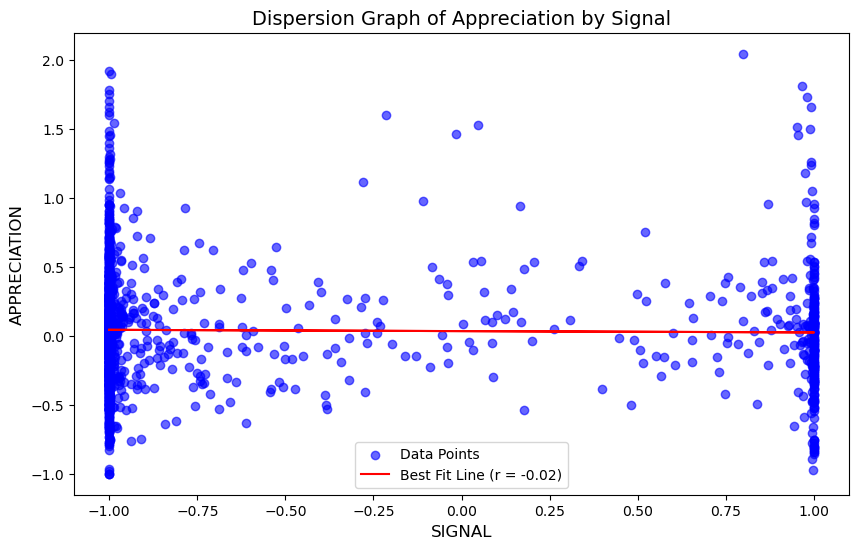

In [85]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(MLP_results['SIGNAL'], MLP_results['APPRECIATION'], color='blue', alpha=0.6, label='Data Points')

# Fit a line using linear regression
slope, intercept, r_value, p_value, std_err = linregress(MLP_results['SIGNAL'], MLP_results['APPRECIATION'])
best_fit_line = slope * MLP_results['SIGNAL'] + intercept

# Plot the best-fit line
plt.plot(MLP_results['SIGNAL'], best_fit_line, color='red', label=f'Best Fit Line (r = {r_value:.2f})')

# Adding labels and title
plt.xlabel('SIGNAL', fontsize=12)
plt.ylabel('APPRECIATION', fontsize=12)
plt.title('Dispersion Graph of Appreciation by Signal', fontsize=14)
plt.legend()

# Display the plot
plt.show()

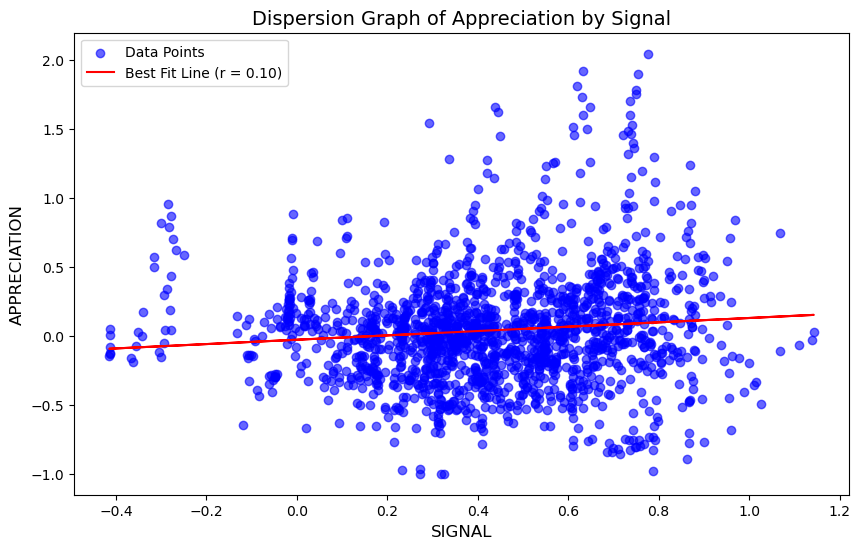

In [86]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(anfis_results['SIGNAL'], anfis_results['APPRECIATION'], color='blue', alpha=0.6, label='Data Points')

# Fit a line using linear regression
slope, intercept, r_value, p_value, std_err = linregress(anfis_results['SIGNAL'], anfis_results['APPRECIATION'])
best_fit_line = slope * anfis_results['SIGNAL'] + intercept

# Plot the best-fit line
plt.plot(anfis_results['SIGNAL'], best_fit_line, color='red', label=f'Best Fit Line (r = {r_value:.2f})')

# Adding labels and title
plt.xlabel('SIGNAL', fontsize=12)
plt.ylabel('APPRECIATION', fontsize=12)
plt.title('Dispersion Graph of Appreciation by Signal', fontsize=14)
plt.legend()

# Display the plot
plt.show()

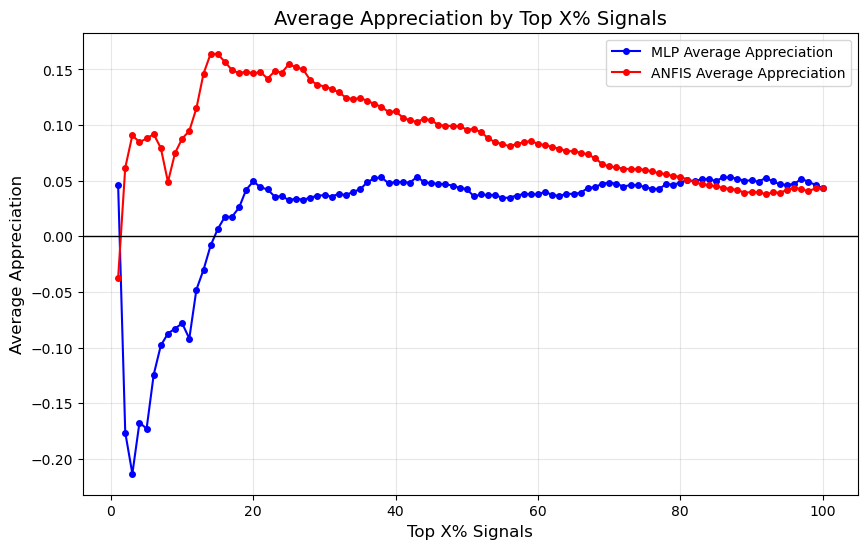

In [87]:
# Sort the DataFrame by 'SIGNAL' in descending order
MLP_results_sorted = MLP_results.sort_values(by='SIGNAL', ascending=False).reset_index(drop=True).copy()
anfis_results_sorted = anfis_results.sort_values(by='SIGNAL', ascending=False).reset_index(drop=True).copy()

# Calculate top X percentages and corresponding average appreciation
percentages = np.linspace(0, 100, 101)  # From 0% to 100% in steps of 1%

MPL_average_appreciations = [
    MLP_results_sorted['APPRECIATION'][:int(len(MLP_results_sorted) * (p / 100))].mean()
    for p in percentages
]

anfis_average_appreciations = [
    anfis_results_sorted['APPRECIATION'][:int(len(anfis_results_sorted) * (p / 100))].mean()
    for p in percentages
]


# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(percentages, MPL_average_appreciations, color='blue', marker='o', markersize=4, label='MLP Average Appreciation')
plt.plot(percentages, anfis_average_appreciations, color='red', marker='o', markersize=4, label='ANFIS Average Appreciation')

# Add labels, title, and legend
plt.xlabel('Top X% Signals', fontsize=12)
plt.ylabel('Average Appreciation', fontsize=12)
plt.title('Average Appreciation by Top X% Signals', fontsize=14)
plt.legend()

# Add a bold line at y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Display the plot
plt.grid(alpha=0.3)
plt.show()

In [88]:
MLP_results[(MLP_results['CLASS_PRED']==1) & (MLP_results['DATE'].dt.year == 2023) & (MLP_results['DATE'].dt.month == 1)]['APPRECIATION'].mean()

0.1589233513280346

In [108]:
# Initialize an empty DataFrame to store results
results_list = []

for year in [2022, 2023]:
    for month in range(1,13):
        ref_date = MLP_results[(MLP_results['DATE'].dt.year == year) & (MLP_results['DATE'].dt.month == month)]['DATE'].iloc[0]
        MLP_avg_appreciation = MLP_results[(MLP_results['CLASS_PRED']==1) &
                               (MLP_results['DATE'].dt.year == year) & (MLP_results['DATE'].dt.month == month)]['APPRECIATION'].mean()
        anfis_avg_appreciation = anfis_results[(anfis_results['CLASS_PRED']==1) &
                               (anfis_results['DATE'].dt.year == year) & (anfis_results['DATE'].dt.month == month)]['APPRECIATION'].mean()
        market_avg_appreciation = marketData[(marketData['DATE'].dt.year == year) & (marketData['DATE'].dt.month == month)]['APPRECIATION'].mean()


        # Append the results to the DataFrame
        results_list.append({
                            'DATE': ref_date,
                            'MLP': MLP_avg_appreciation,
                            'ANFIS': anfis_avg_appreciation,
                            'MARKET': market_avg_appreciation
                            })
        
# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)

In [109]:
results_df['']

,DATE,MLP,ANFIS,MARKET
0,2022-01-01,0.051306,-0.064074,0.017225
1,2022-02-01,-0.063727,-0.088299,-0.071166
2,2022-03-01,-0.226329,-0.146963,-0.148010
3,2022-04-01,-0.156391,-0.039815,-0.024178
4,2022-05-01,0.046680,0.014751,-0.021832
5,2022-06-01,0.325855,0.352339,0.201789
6,2022-07-01,0.170770,0.207556,0.187815
7,2022-08-01,-0.032421,0.123338,0.061230
8,2022-09-01,-0.080183,0.140554,0.062841
9,2022-10-01,-0.132080,0.096708,-0.022559


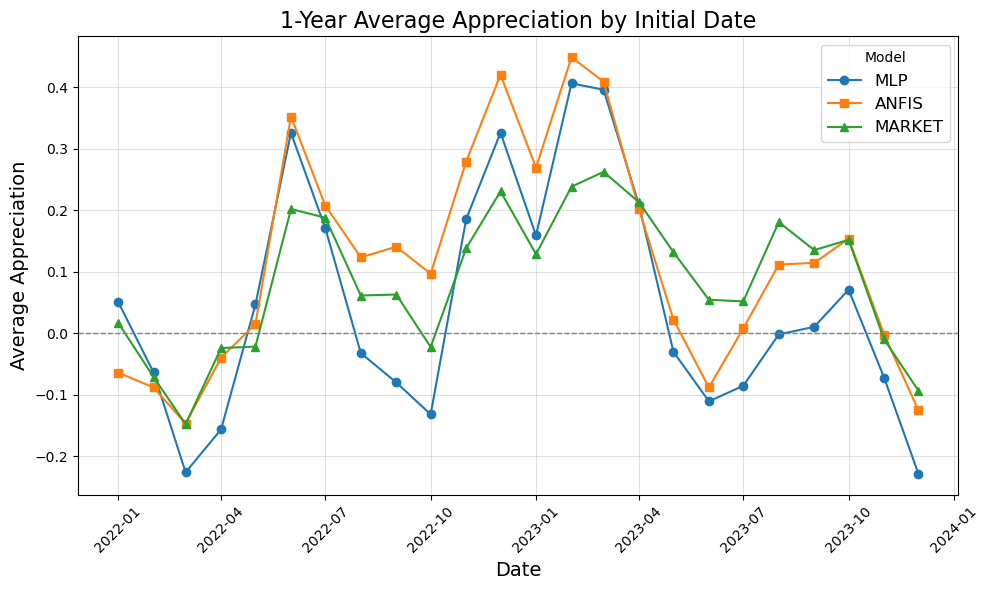

In [136]:
# Ensure the 'DATE' column is sorted for proper plotting
results_df = results_df.sort_values(by='DATE')

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot lines for each column
plt.plot(results_df['DATE'], results_df['MLP'], label='MLP', marker='o')
plt.plot(results_df['DATE'], results_df['ANFIS'], label='ANFIS', marker='s')
plt.plot(results_df['DATE'], results_df['MARKET'], label='MARKET', marker='^')

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Add titles and labels
plt.title('1-Year Average Appreciation by Initial Date', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Appreciation', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Model', fontsize=12)

# Show grid for better visualization
plt.grid(alpha=0.4)

# Show the plot
plt.tight_layout()
plt.show()

In [129]:
# Average appreciation prints:
print(f'Average MLP appreciation: {results_df["MLP"].mean()*100:.3f}%')
print(f'Average ANFIS appreciation: {results_df["ANFIS"].mean()*100:.3f}%')
print(f'Average Market appreciation: {results_df["MARKET"].mean()*100:.3f}%')

Average MLP appreciation: 4.730%
Average ANFIS appreciation: 11.737%
Average Market appreciation: 8.565%
